# Q1

**Marietta Traffic Authority is concerned about the repeated accidents at the intersection of Canton and Piedmont Roads. Bayes-inclined city-engineer would like to estimate the accident rate, even better, find a credible set.**

## A. Compare the Bayes estimator for θ with the MLE (For Poisson, recall, ˆθM LE =  ̄X ).

We are given that the number of accidents in a 3-month period follows a **Poisson distribution**:

$$
X | \theta \sim \text{Poi}(\theta)
$$

The **Jeffreys prior** for Θ is:

$$
\pi(\theta) = \frac{1}{\sqrt{\theta}}, \quad 0 < \theta < \infty
$$

The observed data consists of the number of accidents in four consecutive periods:

$$
X_1 = 1, \quad X_2 = 2, \quad X_3 = 0, \quad X_4 = 2
$$

### **Step 1: Maximum Likelihood Estimator (MLE)**
For a Poisson distribution, the **MLE estimate** of Θ is given by:

$$
\hat{\theta}_{\text{MLE}} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

Substituting the observed data:

$$
\hat{\theta}_{\text{MLE}} = \frac{1+2+0+2}{4} = \frac{5}{4} = 1.25
$$

### **Step 2: Bayesian Estimation - Posterior Distribution**
Using **Bayes' theorem**, the posterior is proportional to:

$$
P(\theta | X) \propto P(X | \theta) P(\theta)
$$

#### **Likelihood Function**:
The likelihood function is:

$$
L(\theta) = \prod_{i=1}^{4} \frac{\theta^{X_i} e^{-\theta}}{X_i!}
$$

$$
L(\theta) = \frac{\theta^{1} e^{-\theta}}{1!} \times \frac{\theta^{2} e^{-\theta}}{2!} \times \frac{\theta^{0} e^{-\theta}}{0!} \times \frac{\theta^{2} e^{-\theta}}{2!}
$$

$$
L(\theta) \propto \theta^{(1+2+0+2)} e^{-4\theta} = \theta^5 e^{-4\theta}
$$

$$
P(X | \theta) = \theta^5 e^{-4\theta}
$$

#### **Prior Distribution**:
The Jeffreys prior is:

$$
P(\theta) = \frac{1}{\sqrt{\theta}}
$$

Thus, the posterior distribution is:

$$
P(\theta | X) \propto \theta^5 e^{-4\theta} \times \frac{1}{\sqrt{\theta}}
$$

$$
P(\theta | X) \propto \theta^{\frac{10}{2} - \frac{1}{2}} e^{-4\theta} = \theta^{\frac{9}{2}} e^{-4\theta}
$$

This is recognized as a **Gamma distribution**:

$$
\theta | X \sim \text{Gamma}\left(\alpha = \frac{11}{2}, \beta = 4\right)
$$

where the Gamma distribution is defined as:

$$
\text{Gamma}(\alpha, \beta) \sim \frac{\beta^\alpha}{\Gamma(\alpha)} \theta^{\alpha - 1} e^{-\beta \theta}
$$

### **Step 3: Bayesian Estimator**
The Bayesian estimator is the **posterior mean**:

$$
E[\theta | X] = \frac{\alpha}{\beta} = \frac{11/2}{4} = \frac{11}{8} = 1.375
$$

### **Step 4: Compare Bayesian Estimator and MLE**
- **MLE Estimate**:

  $$
  \hat{\theta}_{\text{MLE}} = 1.25
  $$

- **Bayesian Estimate**:

  $$
  E[\theta | X] = 1.375
  $$

### **Interpretation**
- The **MLE estimate** is purely based on the observed data.
- The **Bayesian estimate** incorporates prior knowledge, slightly shifting the estimate upwards.
- If we had a strong **informative prior**, the Bayesian estimate could differ more significantly from the MLE.

---

### **Final Answer**
$$
\hat{\theta}_{\text{MLE}} = 1.25, \quad E[\theta | X] = 1.375
$$

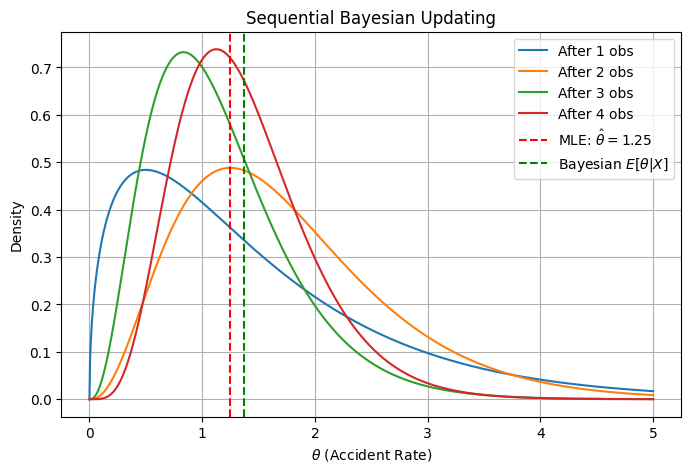

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Observations
observations = [1, 2, 0, 2]

# Initialize prior (Jeffreys prior: Gamma(1/2, 0))
alpha, beta = 0.5, 0
theta_values = np.linspace(0, 5, 1000)
theta_mle = np.mean(observations)

plt.figure(figsize=(8, 5))

# Update posterior sequentially
for i, x in enumerate(observations):
    alpha += x
    beta += 1
    plt.plot(theta_values, gamma.pdf(theta_values, alpha, scale=1/beta), label=f'After {i+1} obs')

# Plot MLE and Bayesian estimate
plt.axvline(theta_mle, color='red', linestyle='--', label=r'MLE: $\hat{\theta} = 1.25$')
plt.axvline(alpha / beta, color='green', linestyle='--', label=r'Bayesian $E[\theta | X]$')

plt.xlabel(r'$\theta$ (Accident Rate)')
plt.ylabel('Density')
plt.title('Sequential Bayesian Updating')
plt.legend()
plt.grid()
plt.show()


The **Maximum Likelihood Estimator (MLE)** for (Θ) is simply the **sample mean**, relying only on observed data without considering prior information. It maximizes the likelihood function to find the most probable value of (Θ).

In contrast, **Bayesian updating** incorporates **both observed data and prior beliefs** to iteratively refine the estimate of (Θ). As new data arrives, the posterior distribution **updates dynamically**, leading to a more **nuanced estimate** that balances prior knowledge with new evidence. Bayesian estimates tend to be **more robust**, especially with small datasets, whereas MLE can be more **sensitive to limited observations**.